In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor()  ,transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set = torchvision.datasets.ImageFolder(root="./data/pets_320by320_train/", transform=transform)
trainloader = torch.utils.data.DataLoader(train_set,batch_size=1,
                                          shuffle=True, num_workers=0)

classes = ('cat', 'dog')

#for batch in trainloader:
    #print(batch[0].size())
    

    
test_set = torchvision.datasets.ImageFolder(root="./data/pets_320by320_test/", transform=transform)
testloader = torch.utils.data.DataLoader(test_set,batch_size=1,
                                     shuffle=True, num_workers=0)



dog


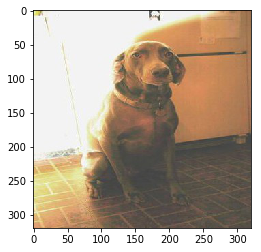

cat


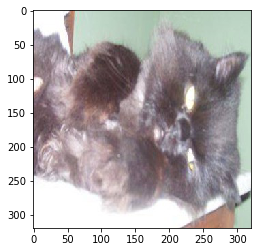

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()


# show images

for j in range(0,2):
    images, labels = dataiter.next()
    print(classes[labels])
    imshow(torchvision.utils.make_grid(images))
    
    
#print(' '.join('%5s' % classes[j] for j in range(0,2)))



In [5]:
import torch.nn as nn
import torch.nn.functional as F

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 18, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(18, 24, 3)
        self.conv3 = nn.Conv2d(24, 64, 3)
        self.fc1 = nn.Linear(64*38*38, 1028)
        self.fc2 = nn.Linear(1028, 120)
        self.fc3 = nn.Linear(120, 64)
        self.fc4 = nn.Linear(64, 2)

    def forward(self, x):
        #print(x.size())
        x = self.pool(F.relu(self.conv1(x)))
        #print(x.size())
        x = self.pool(F.relu(self.conv2(x)))
        #print(x.size())
        x = self.pool(F.relu(self.conv3(x)))
        #print(x.size())
        x = x.view(-1, 64*38*38)
        
        #print(x.size())
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 18, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(18, 24, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(24, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=92416, out_features=1028, bias=True)
  (fc2): Linear(in_features=1028, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=2, bias=True)
)


In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.694
[1,  4000] loss: 0.687
[1,  6000] loss: 0.677
[1,  8000] loss: 0.657
[2,  2000] loss: 0.629
[2,  4000] loss: 0.622
[2,  6000] loss: 0.612
[2,  8000] loss: 0.604
Finished Training


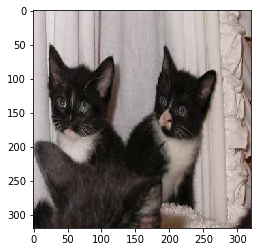

GroundTruth:    cat


In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(1)))

In [9]:
outputs = net(images)
print(outputs)

tensor([[ 0.1397, -0.2922]], grad_fn=<AddmmBackward>)


In [10]:
_, predicted = torch.max(outputs, 1)

print(predicted)
print('Predicted: ', ' '.join('%5s' % classes[predicted]))

tensor([0])
Predicted:      c a t


In [11]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 2000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 2000 test images: 69 %
